<a href="https://colab.research.google.com/github/123shwetarohokale/563-ShwetaR/blob/main/hw4_lattice_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average energy: -1.363945
Q.1=> Average energy per particle at T=1: -2.0702395017625064e-06
T = 1.0, Trial move acceptance rate = 0.1035


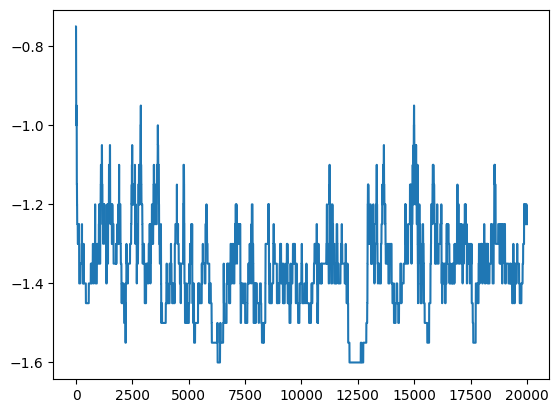

In [ ]:
#HW4
import numpy
directions = [numpy.array((1,0)),numpy.array((0,-1)),numpy.array((-1,0)),numpy.array((0,1))]
def pbc(site,L): #The convention here is to have positive lattice indices
  for i,s in enumerate(site):
    if s >= L:
      site[i] = s - L
    elif s < 0:
      site[i] = s + L
  return site

class grid():
  def __init__(self,N=5,L=4,T=1.0):
    self.L = L
    self.N = N
    self.epsilon = -1
    self.kT = T
    self.particles = []
    for i in range(self.N):
      self.particles.append(particle())
      while True:
        rands = self.random_site()
        if not self.occupied(rands):
          self.particles[-1].location = rands
          break
    self.E = self.energy()

  def occupied(self,site):
    for p in self.particles:
      if numpy.array_equal(p.location,site):
        return True
    return False

  def random_site(self):
    return numpy.array((numpy.random.randint(self.L),numpy.random.randint(self.L)))

  def distance(self,site1,site2):
    return numpy.linalg.norm(site1-site2)

  def energy(self):
    energy = 0
    for p in self.particles:
      neighbors = p.get_neighbors(self.L)
      for n in neighbors:
        if self.occupied(n):
          energy += self.epsilon
    return energy/2

  def __repr__(self):
    m = numpy.zeros((self.L, self.L))
    for p in self.particles:
      m[tuple(p.location)] = 1
    return str(m)

class particle():
  def __init__(self):
    self.location = numpy.array((-1,-1)) #negative index means unplaced

  def get_neighbors(self,L):
    neighbors = []
    for d in directions:
      neighbors.append( pbc(d+self.location, L))
    return neighbors

class simulation():
  def __init__(self,N=5,L=3,T=1.,steps = 1000,seed=2):
    numpy.random.seed(seed)
    self.grid = grid(N,L,T)
    self.accepted = 0
    self.rejected = 0
    self.energies = numpy.zeros(steps)
    for i in range(steps):
      self.trial_move()
      self.energies[i] = self.grid.E/N
      #if i%1000 == 0:
      #  print(i)
      #  print(self.grid.E)
      #  print(self.grid)

  def trial_move(self):
    p = numpy.random.choice(self.grid.particles)
    old = p.location
    oldE = self.grid.E
    trial = self.grid.random_site()
    if not self.grid.occupied(trial):
      p.location = trial
      E = self.grid.energy()
      dE = E - oldE
      if numpy.random.rand() < numpy.exp(-dE/self.grid.kT):
        self.grid.E = E
        self.accepted += 1
        return
    p.location = old #need to reject moves that are overlaps
    self.grid.E = oldE
    self.rejected += 1
import matplotlib.pyplot as plt
s = simulation(N=20,L=7,T=0.5,steps=20000, seed = 2)
plt.plot(s.energies)

average_energy = numpy.mean(s.energies)
print(f"Average energy: {average_energy}")

# Average Energy per Particle = Total energy / Number of particles
T = 1.0
L=7
#V= Total number of elements Or lattice
V= L**L
N= 0.8 * V
average_energy_per_particle = numpy.mean(s.energies) / N
print(f"Q.1=> Average energy per particle at T=1: {average_energy_per_particle}")
total_moves = s.accepted + s.rejected
acceptance_rate = s.accepted / total_moves if total_moves > 0 else 0
print(f"T = {T}, Trial move acceptance rate = {acceptance_rate:.4f}")


L=5, N=20, Avg Energy per Particle=-0.0821, Std Dev=0.0002
L=6, N=28, Avg Energy per Particle=-0.0577, Std Dev=0.0001
L=7, N=39, Avg Energy per Particle=-0.0425, Std Dev=0.0003
L=8, N=51, Avg Energy per Particle=-0.0324, Std Dev=0.0001
L=9, N=64, Avg Energy per Particle=-0.0258, Std Dev=0.0001
L=10, N=80, Avg Energy per Particle=-0.0209, Std Dev=0.0001


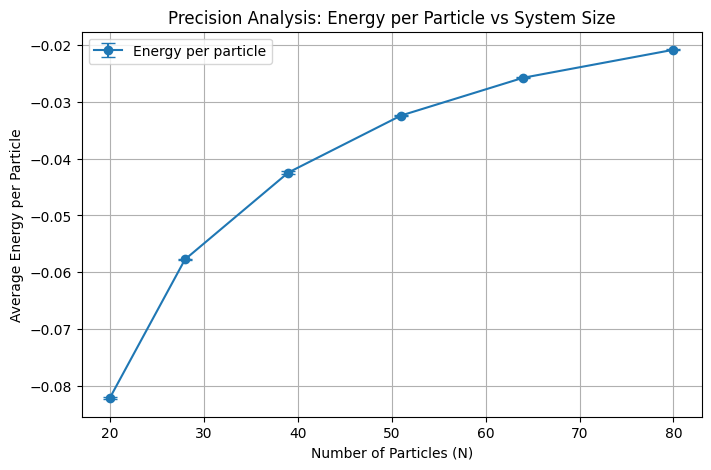

In [7]:
# Question 02:
import numpy as np
import matplotlib.pyplot as plt
T = 1.0
density = 0.8  # N/V
L_values = [5, 6, 7, 8, 9, 10]
num_trials = 5
average_energies = []
std_devs = []
N_values = []

for L in L_values:
    V = L**2
    N = int(density * V)
    N_values.append(N)
    trial_energies = []
    for _ in range(num_trials):
        s = simulation(N=N, L=L, T=T, steps=10000, seed=np.random.randint(100000))
        avg_energy_per_particle = np.mean(s.energies) / N
        trial_energies.append(avg_energy_per_particle)
    mean_energy = np.mean(trial_energies)
    std_energy = np.std(trial_energies)
    average_energies.append(mean_energy)
    std_devs.append(std_energy)
    print(f"L={L}, N={N}, Avg Energy per Particle={mean_energy:.4f}, Std Dev={std_energy:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.errorbar(N_values, average_energies, yerr=std_devs, fmt='o-', capsize=5, label="Energy per particle")
plt.xlabel("Number of Particles (N)")
plt.ylabel("Average Energy per Particle")
plt.title("Precision Analysis: Energy per Particle vs System Size")
plt.legend()
plt.grid()
plt.show()

L=4, N=12, Avg Energy per Particle=-0.1278, Std Dev=0.0002
L=6, N=28, Avg Energy per Particle=-0.0578, Std Dev=0.0002
L=8, N=51, Avg Energy per Particle=-0.0326, Std Dev=0.0003
L=10, N=80, Avg Energy per Particle=-0.0208, Std Dev=0.0001
L=12, N=115, Avg Energy per Particle=-0.0145, Std Dev=0.0000
L=14, N=156, Avg Energy per Particle=-0.0107, Std Dev=0.0001


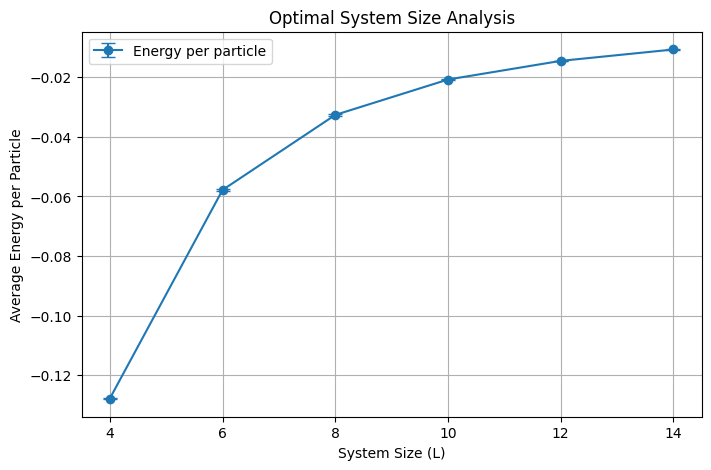

In [ ]:
# Question 4
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1.0  # Fixed temperature
density = 0.8  # Number density N/V
steps = 5000  # Reduce steps for faster testing
num_trials = 3  # Multiple runs per L to improve accuracy

# Grid sizes to test
L_values = [4, 6, 8, 10, 12, 14]
average_energies = []
std_devs = []

# Run simulations for different system sizes
for L in L_values:
    V = L**2  # Total lattice sites
    N = int(density * V)  # Number of particles
    trial_energies = []
    for _ in range(num_trials):
        s = simulation(N=N, L=L, T=T, steps=steps, seed=np.random.randint(100000))
        avg_energy_per_particle = np.mean(s.energies) / N
        trial_energies.append(avg_energy_per_particle)
    # mean and standard deviation
    mean_energy = np.mean(trial_energies)
    std_energy = np.std(trial_energies)
    average_energies.append(mean_energy)
    std_devs.append(std_energy)
    print(f"L={L}, N={N}, Avg Energy per Particle={mean_energy:.4f}, Std Dev={std_energy:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.errorbar(L_values, average_energies, yerr=std_devs, fmt='o-', capsize=5, label="Energy per particle")
plt.xlabel("System Size (L)")
plt.ylabel("Average Energy per Particle")
plt.title("Optimal System Size Analysis")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import time
for N in [5,10,50,100,200,500]:
  t1 = time.perf_counter()
  s = simulation(N=N,L=100,T=0.5,steps=100, seed = 2)
  t2 = time.perf_counter()
  print("\nN=",N,"seconds/100steps =", t2-t1)
  if t2-t1 > 30:
    print("Taking a minute for 200 steps. TOO SLOW")
    break


0
0.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

N= 5 seconds/100steps = 0.06368385799942189
0
0.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

N= 10 seconds/100steps = 0.15734932699979254
0
-1.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

N= 50 seconds/100steps = 4.362202834000527
0
-4.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

N= 100 seconds/100steps = 13.763136806000148
0
-8.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

N= 20

In [ ]:
# Question 03:
import matplotlib.pyplot as plt
energies = []
Ts =  [4,2,1,0.9,0.7, 0.5, 0.2, 0.05]
for T in Ts:
  s = simulation(N=20,L=7,T=T,steps=10000, seed = numpy.random.randint(100000))
  energies.append(s.energies)
  average_energy = numpy.mean(s.energies)
  average_energy_per_particle = np.mean(s.energies) / N
  print(f"T = {T}, Average energy per particle = {average_energy_per_particle:.4f}")

T = 4, Average energy per particle = -0.0108
T = 2, Average energy per particle = -0.0115
T = 1, Average energy per particle = -0.0134
T = 0.9, Average energy per particle = -0.0139
T = 0.7, Average energy per particle = -0.0151
T = 0.5, Average energy per particle = -0.0165
T = 0.2, Average energy per particle = -0.0195
T = 0.05, Average energy per particle = -0.0198


In [ ]:
for T,e in zip(Ts,energies):
  print("T=",T, ", <E>=", numpy.array(e).mean())
#hard to say from the energy averages when N<10, but looking at the configurations
#maybe clustering starts to happen more around 0.7
#though the plots look qualitatively different at 0.5.

#rerunning with N=20, L=7, maxT=10000, looks like it'll take about 3 min.

T= 4 , <E>= -0.8635200000000001
T= 2 , <E>= -0.9285399999999999
T= 1 , <E>= -1.0862749999999999
T= 0.9 , <E>= -1.10584
T= 0.7 , <E>= -1.1992800000000001
T= 0.5 , <E>= -1.3737799999999998
T= 0.2 , <E>= -1.5804500000000004


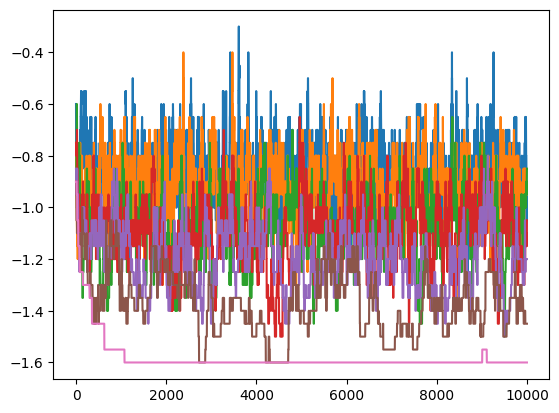

In [ ]:
for e in energies:
  plt.plot(e)
# Yeah, 0.2 clusters up at the energy minimum, 0.5 touches it, and 0.7 starts clumping.

In [ ]:
# Question 5
import numpy as np

# Define simulation parameters
L = 7  # Grid size
density = 0.8  # Number density N/V
V = L**2  # Total number of lattice sites
N = int(density * V)  # Number of particles
steps = 10000  # Number of steps
# Temperatures to test
Ts = [1.0, 0.05]
for T in Ts:
    s = simulation(N=N, L=L, T=T, steps=steps, seed=np.random.randint(100000))
    # Compute acceptance rate
    total_moves = s.accepted + s.rejected
    acceptance_rate = s.accepted / total_moves if total_moves > 0 else 0
    print(f"T = {T}, Trial move acceptance rate = {acceptance_rate:.4f}")

T = 1.0, Trial move acceptance rate = 0.1217
T = 0.05, Trial move acceptance rate = 0.0081
